In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = tf.placeholder(tf.float32, [None, 5])

In [5]:
w = tf.Variable(tf.zeros([5, 1]))

In [6]:
y = tf.matmul(x, w)

In [7]:
t = tf.placeholder(tf.float32, [None, 1])

In [10]:
loss = tf.reduce_sum(tf.square(y - t))

In [11]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month ** n

In [15]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.012341
Step: 20000, Loss: 29.450821
Step: 30000, Loss: 28.034981
Step: 40000, Loss: 26.853539
Step: 50000, Loss: 25.776312
Step: 60000, Loss: 24.763887
Step: 70000, Loss: 23.833887
Step: 80000, Loss: 23.012321
Step: 90000, Loss: 31.459843
Step: 100000, Loss: 21.431906


In [16]:
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 110000, Loss: 20.748278
Step: 120000, Loss: 20.200783
Step: 130000, Loss: 19.524529
Step: 140000, Loss: 35.969006
Step: 150000, Loss: 18.509336
Step: 160000, Loss: 18.014692
Step: 170000, Loss: 17.631437
Step: 180000, Loss: 17.175123
Step: 190000, Loss: 16.803270
Step: 200000, Loss: 16.465893


In [17]:
w_val = sess.run(w)
print(w_val)

[[ 6.1079483 ]
 [-4.0438776 ]
 [ 2.51106262]
 [-0.28175303]
 [ 0.00834802]]


In [18]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result  += w_val[n][0] * x ** n
    return result

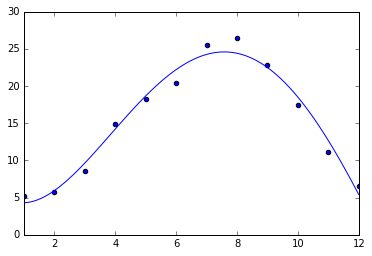

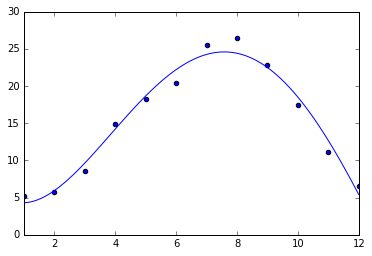

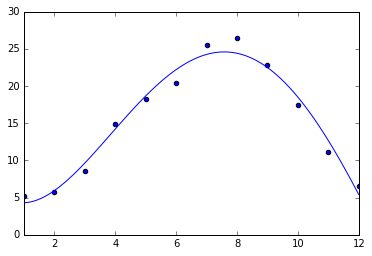

In [24]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)
plt.show()

In [27]:
tf.summary.FileWriter('./../../../logs', sess.graph)